In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from preprocessing import preprocess_dataframe
import data_settings as settings

In [2]:
df_train = pd.read_csv("./data/no1_train.csv")
df_test = pd.read_csv("./data/no1_validation.csv")

In [3]:
df_train, scaler = preprocess_dataframe(df_train, noise=settings.GAUSSIAN_NOISE)
df_test, _ = preprocess_dataframe(df_test, scaler)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/home/jupyter/IT3030-Deep-Learning/Project3/preprocessing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y_prev"] = df["y"].shift(1)
/home/jupyter/IT3030-Deep-Learning/Project3/preprocessing.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

<AxesSubplot:ylabel='sum'>

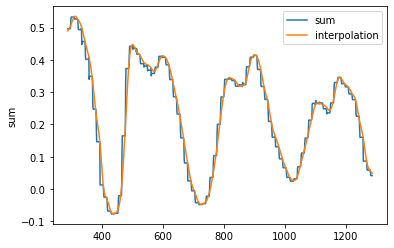

In [4]:
sns.lineplot(data=df_train[0:1000], x=df_train.index[0:1000], y='sum', label="sum")
sns.lineplot(data=df_train[0:1000], x=df_train.index[0:1000], y='interpolation', label="interpolation")

<AxesSubplot:ylabel='time_of_week'>

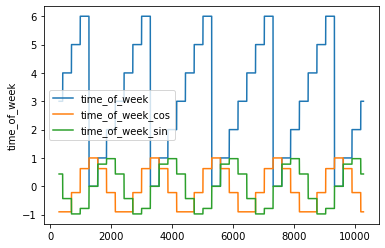

In [5]:
sns.lineplot(data=df_train[0:10000], x=df_train.index[0:10000], y="time_of_week", label="time_of_week")
sns.lineplot(data=df_train[0:10000], x=df_train.index[0:10000], y="time_of_week_cos", label="time_of_week_cos")
sns.lineplot(data=df_train[0:10000], x=df_train.index[0:10000], y="time_of_week_sin", label="time_of_week_sin")

In [6]:
df_train.describe()

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day,time_of_week,...,time_of_day_sin,time_of_week_sin,time_of_year_sin,time_of_hour_sin,interpolation,structural_imbalance,sum,y_prev,y_prev_24h,y_yesterday
count,222548.000000,222548.000000,222548.000000,222548.000000,222548.000000,222548.000000,222548.000000,222548.000000,222548.000000,222548.000000,...,222548.000000,222548.000000,2.225480e+05,2.225480e+05,222548.000000,222548.000000,222548.000000,222548.000000,222548.000000,222548.000000
mean,0.046311,0.075151,0.698020,-0.368951,0.075487,-0.364381,0.259188,0.145426,11.506089,3.005909,...,-0.000860,-0.001621,1.918182e-02,8.472962e-05,-0.222195,-0.114021,-0.223428,-0.364380,-0.364392,-0.363414
std,0.342308,0.430538,0.276431,0.533880,0.350204,0.217487,0.067335,0.424852,6.926027,1.998230,...,0.706945,0.707332,6.894992e-01,7.071084e-01,0.421707,0.117090,0.420860,0.217487,0.217455,0.189221
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,...,-1.000000,-0.974928,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.916516
25%,-0.177211,-0.217731,0.719844,-0.822568,-0.139289,-0.475003,0.271889,-0.178534,6.000000,1.000000,...,-0.707107,-0.781831,-5.000000e-01,-5.000000e-01,-0.571937,-0.152680,-0.571489,-0.475003,-0.475003,-0.455530
50%,0.083538,0.089178,0.719844,-0.526500,0.120796,-0.372351,0.271889,0.158938,12.000000,3.000000,...,0.000000,0.000000,1.224647e-16,1.224647e-16,-0.265763,-0.114103,-0.266863,-0.372351,-0.372330,-0.375934
75%,0.291775,0.409557,0.875486,0.004244,0.318329,-0.268609,0.271889,0.500762,18.000000,5.000000,...,0.707107,0.781831,5.000000e-01,8.660254e-01,0.101416,-0.091980,0.099416,-0.268607,-0.268480,-0.283074
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,6.000000,...,1.000000,0.974928,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.959918


In [7]:
df_train

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day,time_of_week,...,time_of_day_sin,time_of_week_sin,time_of_year_sin,time_of_hour_sin,interpolation,structural_imbalance,sum,y_prev,y_prev_24h,y_yesterday
288,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.098075,0.271889,-0.578062,14,3,...,-0.500000,0.433884,0.000000,8.660254e-01,0.489911,-0.059814,0.496304,-0.100013,-0.252909,-0.209047
289,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.099796,0.271889,-0.578062,14,3,...,-0.500000,0.433884,0.000000,1.000000e+00,0.491196,-0.066980,0.496304,-0.098075,-0.237720,-0.209047
290,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.099255,0.271889,-0.578062,14,3,...,-0.500000,0.433884,0.000000,8.660254e-01,0.492549,-0.074518,0.496304,-0.099796,-0.219901,-0.209047
291,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.116709,0.271889,-0.578062,14,3,...,-0.500000,0.433884,0.000000,5.000000e-01,0.493986,-0.082530,0.496304,-0.099255,-0.219888,-0.209047
292,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.122092,0.271889,-0.578062,14,3,...,-0.500000,0.433884,0.000000,1.224647e-16,0.495526,-0.091115,0.496304,-0.116709,-0.221019,-0.209047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,0.089101,-0.170621,0.564202,0.209443,0.132078,-0.294403,0.271889,0.063349,3,0,...,0.707107,0.000000,0.866025,5.000000e-01,-0.136336,-0.028532,-0.122527,-0.292695,-0.324977,-0.173424
225084,0.089101,-0.170621,0.564202,0.209443,0.132078,-0.289323,0.271889,0.063349,3,0,...,0.707107,0.000000,0.866025,8.660254e-01,-0.130389,-0.061683,-0.122527,-0.294403,-0.311891,-0.173424
225085,0.089101,-0.170621,0.564202,0.209443,0.132078,-0.299279,0.271889,0.063349,3,0,...,0.707107,0.000000,0.866025,1.000000e+00,-0.123720,-0.098860,-0.122527,-0.289323,-0.318147,-0.173424
225086,0.089101,-0.170621,0.564202,0.209443,0.132078,-0.274663,0.271889,0.063349,3,0,...,0.707107,0.000000,0.866025,8.660254e-01,-0.116293,-0.140261,-0.122527,-0.299279,-0.318579,-0.173424


In [8]:
df_test.describe()

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day,time_of_week,...,time_of_day_sin,time_of_week_sin,time_of_year_sin,time_of_hour_sin,interpolation,structural_imbalance,sum,y_prev,y_prev_24h,y_yesterday
count,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,...,2.756600e+04,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000,27566.000000
mean,-0.012024,-0.043089,0.257485,-0.233813,0.013858,-0.364773,0.259963,0.162617,11.483494,3.024995,...,9.955310e-04,0.003548,0.885615,-0.000614,-0.262997,-0.112938,-0.263918,-0.364771,-0.365207,-0.371614
std,0.379562,0.488015,0.616086,0.623723,0.388166,0.182508,0.044315,0.329085,6.925406,1.981630,...,7.081178e-01,0.709197,0.115794,0.707196,0.250438,0.128875,0.250148,0.182508,0.182852,0.189105
min,-1.414855,-1.330004,-1.000000,-1.000000,-1.468855,-2.396002,-0.115207,-0.553454,0.000000,0.000000,...,-1.000000e+00,-0.974928,0.500000,-1.000000,-1.008935,-3.721167,-0.948944,-2.396002,-2.396002,-1.961342
25%,-0.317775,-0.364968,0.564202,-0.798739,-0.275910,-0.429812,0.271889,-0.069590,5.000000,1.000000,...,-7.071068e-01,-0.781831,0.866025,-0.866025,-0.441572,-0.149726,-0.441657,-0.429812,-0.431832,-0.407531
50%,-0.051828,-0.262388,0.564202,-0.426784,-0.037538,-0.340068,0.271889,0.068393,11.000000,3.000000,...,1.224647e-16,0.000000,0.866025,0.000000,-0.272722,-0.112501,-0.274306,-0.340057,-0.340239,-0.353760
75%,0.270715,-0.015827,0.564202,0.306250,0.266670,-0.266200,0.271889,0.439216,17.000000,5.000000,...,7.071068e-01,0.781831,1.000000,0.500000,-0.097491,-0.089741,-0.101924,-0.266200,-0.265771,-0.287488
max,0.750499,0.951685,0.797665,1.045455,0.841073,-0.061064,0.367127,0.939012,23.000000,6.000000,...,1.000000e+00,0.974928,1.000000,1.000000,0.443457,3.529554,0.443788,-0.061064,-0.061064,-0.174390


In [9]:
df_train.to_csv("./data/train_dataset_alt.csv", index=False)
df_test.to_csv("./data/test_dataset_alt.csv", index=False)